In [1]:
import pandas as pd
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

In [2]:
# 기본
import re
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.externals import joblib 
from sklearn.metrics import make_scorer

# 회귀분석
from sklearn.model_selection import train_test_split
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

# Deep Neural Network
import tensorflow as tf
#from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dropout
# from keras.layers.recurrent import LSTM
# from keras.models import Sequential
# import time

# # 설정
%matplotlib inline
pd.options.display.max_columns = 400
pd.options.display.float_format = '{:.5f}'.format



/home/sundooedu/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [3]:
def grap_year(data):
    data = str(data)
    return int(data[:4])

def grap_month(data):
    data = str(data)
    return int(data[4:])

In [5]:
data = pd.read_csv('201901-202003.csv')

In [6]:
data = data.fillna('') # Null에 ''로 채워넣음

In [7]:
data.isnull().sum()

REG_YYMM        0
CARD_SIDO_NM    0
CARD_CCG_NM     0
STD_CLSS_NM     0
HOM_SIDO_NM     0
HOM_CCG_NM      0
AGE             0
SEX_CTGO_CD     0
FLC             0
CSTMR_CNT       0
AMT             0
CNT             0
dtype: int64

In [8]:
data

,REG_YYMM,CARD_SIDO_NM,CARD_CCG_NM,STD_CLSS_NM,HOM_SIDO_NM,HOM_CCG_NM,AGE,SEX_CTGO_CD,FLC,CSTMR_CNT,AMT,CNT
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8
2,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,2,2,6,818700,6
3,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,3,4,1717000,5
4,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,40s,1,4,3,1047300,3
...,...,...,...,...,...,...,...,...,...,...,...,...
24697787,202003,충북,충주시,휴양콘도 운영업,충북,충주시,30s,1,2,3,43300,4
24697788,202003,충북,충주시,휴양콘도 운영업,충북,충주시,40s,1,3,3,35000,3
24697789,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,1,4,4,188000,6
24697790,202003,충북,충주시,휴양콘도 운영업,충북,충주시,50s,2,4,4,99000,6


In [9]:
# 날짜 처리
data = data.fillna('') # Null에 ''로 채워넣음
data['year'] = data['REG_YYMM'].apply(lambda x: grap_year(x))
data['month'] = data['REG_YYMM'].apply(lambda x: grap_month(x))
data = data.drop(['REG_YYMM'], axis=1)

In [10]:
# 데이터 정제
df = data.copy()
df = df.drop(['CARD_CCG_NM', 'HOM_CCG_NM'], axis=1) # 시군구에 대한 데이터 드랍
columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month']
#columns = ['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'REG_YYMM']
df = df.groupby(columns).sum().reset_index(drop=False)


In [11]:
df.describe()

,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,AMT,CNT
count,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000,1057394.00000
mean,1.44486,2.84399,2019.17713,5.71534,1447.41349,57023235.47231,2944.06108
std,0.49695,1.37150,0.38178,3.59681,11216.15206,476574321.54572,27674.18655
min,1.00000,1.00000,2019.00000,1.00000,3.00000,800.00000,1.00000
25%,1.00000,2.00000,2019.00000,2.00000,7.00000,235700.00000,10.00000
50%,1.00000,3.00000,2019.00000,5.00000,30.00000,1144865.00000,43.00000
75%,2.00000,4.00000,2019.00000,9.00000,193.00000,7827327.50000,295.00000
max,2.00000,5.00000,2020.00000,12.00000,649192.00000,34925518737.00000,2134015.00000


In [12]:
# 인코딩
# data type이 object 일 때 encoder로 숫자를 부여 해준다.
dtypes = df.dtypes
encoders = {}
for column in df.columns:
    if str(dtypes[column]) == 'object':
        encoder = LabelEncoder()
        encoder.fit(df[column])
        encoders[column] = encoder
        
df_num = df.copy()        
for column in encoders.keys():
    encoder = encoders[column]
    df_num[column] = encoder.transform(df[column])

In [41]:
x = df_num.drop(['AMT'],axis=1)
#x = df_num.drop(['AMT','AGE','SEX_CTGO_CD','FLC','HOM_SIDO_NM','CSTMR_CNT','CNT'],axis=1)
y = df_num['AMT']

In [14]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.04)

# neural Network

In [15]:
x_test

,CARD_SIDO_NM,STD_CLSS_NM,HOM_SIDO_NM,AGE,SEX_CTGO_CD,FLC,year,month,CSTMR_CNT,CNT
986990,15,34,0,2,1,2,2020,2,94,363
54833,0,38,8,6,2,5,2019,10,51,85
892097,14,20,1,1,2,2,2019,9,13,16
179538,2,31,12,1,2,1,2019,12,11,15
396626,6,37,16,4,2,4,2020,2,389,500
...,...,...,...,...,...,...,...,...,...,...
933417,14,39,8,1,2,1,2019,3,91,110
671178,10,34,13,2,2,2,2019,10,3,3
432256,7,21,8,4,1,4,2019,6,508,557
584342,8,35,2,6,1,5,2019,3,1788,4520


In [16]:
model= tf.keras.Sequential()

In [17]:
model.add(layers.Input(shape=x_train.shape[1]))
model.add(layers.Dense(256, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(layers.Dense(128, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(layers.Dense(64, activation='sigmoid'))
model.add(Dropout(0.25))
model.add(layers.Dense(1))

model.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])

In [18]:
hist = model.fit(x_train,y_train,epochs=1 , batch_size = 128 , validation_split =0.3)

232/232 [==============================] - 1s 3ms/step - loss: 154.5091 - mean_squared_logarithmic_error: 154.5091 - val_loss: 145.8073 - val_mean_squared_logarithmic_error: 145.8073


In [19]:
model.evaluate(x_test,y_test, batch_size=128)

7931/7931 [==============================] - 7s 872us/step - loss: 144.7849 - mean_squared_logarithmic_error: 144.7849


[144.7848663330078, 144.7848663330078]

In [20]:
hist.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])

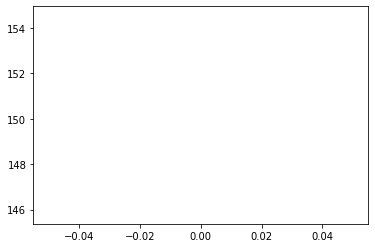

In [23]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])

In [22]:
# plt.plot(hist.history['accuracy'])
# plt.plot(hist.history['val_accuracy'])

KeyError: 'accuracy'

# One-Hot

In [24]:
df_1hot = pd.get_dummies(df,columns = ['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM', 'HOM_SIDO_NM','AGE'])
df_1hot

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,HOM_SIDO_NM_강원,HOM_SIDO_NM_경기,HOM_SIDO_NM_경남,HOM_SIDO_NM_경북,HOM_SIDO_NM_광주,HOM_SIDO_NM_대구,HOM_SIDO_NM_대전,HOM_SIDO_NM_부산,HOM_SIDO_NM_서울,HOM_SIDO_NM_세종,HOM_SIDO_NM_울산,HOM_SIDO_NM_인천,HOM_SIDO_NM_전남,HOM_SIDO_NM_전북,HOM_SIDO_NM_제주,HOM_SIDO_NM_충남,HOM_SIDO_NM_충북,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,4,311200,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,3,605000,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,139000,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,27500,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,3,395500,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057389,5,3,148000,4,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1057390,5,5,329800,7,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1057391,5,7,557800,7,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1057392,5,3,247800,3,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [25]:
['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM', 'HOM_SIDO_NM','AGE']

['year',
 'month',
 'SEX_CTGO_CD',
 'CARD_SIDO_NM',
 'STD_CLSS_NM',
 'HOM_SIDO_NM',
 'AGE']

In [26]:
df_1hot.head()

,FLC,CSTMR_CNT,AMT,CNT,year_2019,year_2020,month_1,month_2,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12,SEX_CTGO_CD_1,SEX_CTGO_CD_2,CARD_SIDO_NM_강원,CARD_SIDO_NM_경기,CARD_SIDO_NM_경남,CARD_SIDO_NM_경북,CARD_SIDO_NM_광주,CARD_SIDO_NM_대구,CARD_SIDO_NM_대전,CARD_SIDO_NM_부산,CARD_SIDO_NM_서울,CARD_SIDO_NM_세종,CARD_SIDO_NM_울산,CARD_SIDO_NM_인천,CARD_SIDO_NM_전남,CARD_SIDO_NM_전북,CARD_SIDO_NM_제주,CARD_SIDO_NM_충남,CARD_SIDO_NM_충북,STD_CLSS_NM_건강보조식품 소매업,STD_CLSS_NM_골프장 운영업,STD_CLSS_NM_과실 및 채소 소매업,STD_CLSS_NM_관광 민예품 및 선물용품 소매업,STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업,STD_CLSS_NM_그외 기타 스포츠시설 운영업,STD_CLSS_NM_그외 기타 종합 소매업,STD_CLSS_NM_기타 대형 종합 소매업,STD_CLSS_NM_기타 수상오락 서비스업,STD_CLSS_NM_기타 외국식 음식점업,STD_CLSS_NM_기타 주점업,STD_CLSS_NM_기타음식료품위주종합소매업,STD_CLSS_NM_내항 여객 운송업,STD_CLSS_NM_마사지업,STD_CLSS_NM_면세점,STD_CLSS_NM_버스 운송업,STD_CLSS_NM_비알콜 음료점업,STD_CLSS_NM_빵 및 과자류 소매업,STD_CLSS_NM_서양식 음식점업,STD_CLSS_NM_수산물 소매업,STD_CLSS_NM_슈퍼마켓,STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업,STD_CLSS_NM_여관업,STD_CLSS_NM_여행사업,STD_CLSS_NM_욕탕업,STD_CLSS_NM_육류 소매업,STD_CLSS_NM_일반유흥 주점업,STD_CLSS_NM_일식 음식점업,STD_CLSS_NM_자동차 임대업,STD_CLSS_NM_전시 및 행사 대행업,STD_CLSS_NM_정기 항공 운송업,STD_CLSS_NM_중식 음식점업,STD_CLSS_NM_차량용 가스 충전업,STD_CLSS_NM_차량용 주유소 운영업,STD_CLSS_NM_체인화 편의점,STD_CLSS_NM_택시 운송업,STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업,STD_CLSS_NM_한식 음식점업,STD_CLSS_NM_호텔업,STD_CLSS_NM_화장품 및 방향제 소매업,STD_CLSS_NM_휴양콘도 운영업,HOM_SIDO_NM_강원,HOM_SIDO_NM_경기,HOM_SIDO_NM_경남,HOM_SIDO_NM_경북,HOM_SIDO_NM_광주,HOM_SIDO_NM_대구,HOM_SIDO_NM_대전,HOM_SIDO_NM_부산,HOM_SIDO_NM_서울,HOM_SIDO_NM_세종,HOM_SIDO_NM_울산,HOM_SIDO_NM_인천,HOM_SIDO_NM_전남,HOM_SIDO_NM_전북,HOM_SIDO_NM_제주,HOM_SIDO_NM_충남,HOM_SIDO_NM_충북,AGE_10s,AGE_20s,AGE_30s,AGE_40s,AGE_50s,AGE_60s,AGE_70s
0,1,4,311200,4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,3,605000,3,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2,1,3,139000,3,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,1,3,27500,3,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,1,3,395500,3,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


In [27]:
x = df_1hot.drop(['AMT'],axis=1)
y = df_1hot['AMT']

In [28]:
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.04)

# randomforest

In [42]:
from sklearn.ensemble import RandomForestRegressor

In [43]:
rf = RandomForestRegressor()

In [44]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [45]:
rf.score(x_test,y_test)

0.9172249783639922

In [29]:
model2= tf.keras.Sequential()

In [30]:
model2.add(layers.Input(shape=x_train.shape[1]))
model2.add(layers.Dense(256, activation='relu'))
model2.add(Dropout(0.25))
model2.add(layers.Dense(128, activation='relu'))
model2.add(Dropout(0.25))
model2.add(layers.Dense(64, activation='relu'))
model2.add(Dropout(0.25))
model2.add(layers.Dense(1))

model2.compile(optimizer='adam',loss='mean_squared_logarithmic_error',metrics=['mean_squared_logarithmic_error'])

In [31]:
hist = model2.fit(x_train,y_train,epochs=20, validation_split =0.3)

Epoch 1/20
926/926 [==============================] - 1s 2ms/step - loss: 14.6842 - mean_squared_logarithmic_error: 14.6842 - val_loss: 1.3067 - val_mean_squared_logarithmic_error: 1.3067
Epoch 2/20
926/926 [==============================] - 2s 2ms/step - loss: 1.0551 - mean_squared_logarithmic_error: 1.0551 - val_loss: 0.9363 - val_mean_squared_logarithmic_error: 0.9363
Epoch 3/20
926/926 [==============================] - 2s 2ms/step - loss: 0.9577 - mean_squared_logarithmic_error: 0.9577 - val_loss: 0.8978 - val_mean_squared_logarithmic_error: 0.8978
Epoch 4/20
926/926 [==============================] - 1s 1ms/step - loss: 0.9186 - mean_squared_logarithmic_error: 0.9186 - val_loss: 0.8550 - val_mean_squared_logarithmic_error: 0.8550
Epoch 5/20
926/926 [==============================] - 2s 2ms/step - loss: 0.8663 - mean_squared_logarithmic_error: 0.8663 - val_loss: 0.8054 - val_mean_squared_logarithmic_error: 0.8054
Epoch 6/20
926/926 [==============================] - 1s 2ms/step - 

In [32]:
model2.evaluate(x_test,y_test, batch_size=256)

3966/3966 [==============================] - 3s 862us/step - loss: 0.4407 - mean_squared_logarithmic_error: 0.4407


[0.4406719207763672, 0.4406719207763672]

In [33]:
hist.history.keys()

dict_keys(['loss', 'mean_squared_logarithmic_error', 'val_loss', 'val_mean_squared_logarithmic_error'])

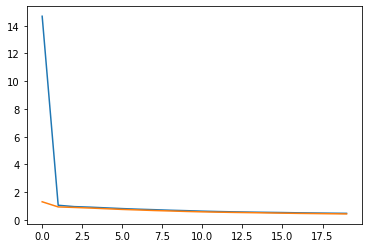

In [34]:
plt.plot(hist.history['mean_squared_logarithmic_error'])
plt.plot(hist.history['val_mean_squared_logarithmic_error'])

In [35]:
pred = model2.predict(x_test)

In [36]:
y_test

674435      8778700
1009189      702210
894655        74300
1048473      357100
827730        79100
             ...   
422596       412350
134365        27900
772725      1958000
195563        30800
973446     44868700
Name: AMT, Length: 1015098, dtype: int64

# Year & Month

In [ ]:
year = x_test[['year_2019','year_2020']].idxmax(1)
year =year.replace("year_2019","2019").replace("year_2020","2020")

In [ ]:
year.unique()

In [ ]:
# month
month =x_test[['month_1','month_2', 'month_3', 'month_4', 'month_5',\
                'month_6','month_7', 'month_8', 'month_9', 'month_10',\
                'month_11','month_12']].idxmax(1)

month = month.replace("month_1","01").replace("month_2","02").replace("month_3","03").replace("month_4","04").replace("month_5","05")\
.replace("month_6","06").replace("month_7","07").replace("month_8","08").replace("month_9","09").replace("month_10","10")\
.replace("month_11","11").replace("month_12","12")

In [ ]:
month.unique()

# Card_sido_nM

In [ ]:
card_sido = x_test[['CARD_SIDO_NM_강원', 'CARD_SIDO_NM_경기', 'CARD_SIDO_NM_경남',
       'CARD_SIDO_NM_경북', 'CARD_SIDO_NM_광주', 'CARD_SIDO_NM_대구',
       'CARD_SIDO_NM_대전', 'CARD_SIDO_NM_부산', 'CARD_SIDO_NM_서울',
       'CARD_SIDO_NM_세종', 'CARD_SIDO_NM_울산', 'CARD_SIDO_NM_인천',
       'CARD_SIDO_NM_전남', 'CARD_SIDO_NM_전북', 'CARD_SIDO_NM_제주',
       'CARD_SIDO_NM_충남', 'CARD_SIDO_NM_충북']].idxmax(1)
card_sido

In [ ]:
card_sido=card_sido.replace("CARD_SIDO_NM_강원","강원").replace("CARD_SIDO_NM_경기","경기").replace("CARD_SIDO_NM_경남","경남").replace("CARD_SIDO_NM_경북","경북")\
.replace("CARD_SIDO_NM_광주","광주").replace("CARD_SIDO_NM_대구","대구").replace("CARD_SIDO_NM_대전","대전").replace("CARD_SIDO_NM_부산","부산")\
.replace("CARD_SIDO_NM_서울","서울").replace("CARD_SIDO_NM_세종","세종").replace("CARD_SIDO_NM_울산","울산").replace("CARD_SIDO_NM_인천","인천")\
.replace("CARD_SIDO_NM_전남","전남").replace("CARD_SIDO_NM_전북","전북").replace("CARD_SIDO_NM_제주","제주").replace("CARD_SIDO_NM_충남","충남")\
.replace("CARD_SIDO_NM_충북","충북")
card_sido

# STD_CLSS_NM

In [ ]:
std_clss = x_test[['STD_CLSS_NM_건강보조식품 소매업', 'STD_CLSS_NM_골프장 운영업',
       'STD_CLSS_NM_과실 및 채소 소매업', 'STD_CLSS_NM_관광 민예품 및 선물용품 소매업',
       'STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업', 'STD_CLSS_NM_그외 기타 스포츠시설 운영업',
       'STD_CLSS_NM_그외 기타 종합 소매업', 'STD_CLSS_NM_기타 대형 종합 소매업',
       'STD_CLSS_NM_기타 수상오락 서비스업', 'STD_CLSS_NM_기타 외국식 음식점업',
       'STD_CLSS_NM_기타 주점업', 'STD_CLSS_NM_기타음식료품위주종합소매업',
       'STD_CLSS_NM_내항 여객 운송업', 'STD_CLSS_NM_마사지업', 'STD_CLSS_NM_면세점',
       'STD_CLSS_NM_버스 운송업', 'STD_CLSS_NM_비알콜 음료점업', 'STD_CLSS_NM_빵 및 과자류 소매업',
       'STD_CLSS_NM_서양식 음식점업', 'STD_CLSS_NM_수산물 소매업', 'STD_CLSS_NM_슈퍼마켓',
       'STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업', 'STD_CLSS_NM_여관업', 'STD_CLSS_NM_여행사업',
       'STD_CLSS_NM_욕탕업', 'STD_CLSS_NM_육류 소매업', 'STD_CLSS_NM_일반유흥 주점업',
       'STD_CLSS_NM_일식 음식점업', 'STD_CLSS_NM_자동차 임대업', 'STD_CLSS_NM_전시 및 행사 대행업',
       'STD_CLSS_NM_정기 항공 운송업', 'STD_CLSS_NM_중식 음식점업',
       'STD_CLSS_NM_차량용 가스 충전업', 'STD_CLSS_NM_차량용 주유소 운영업',
       'STD_CLSS_NM_체인화 편의점', 'STD_CLSS_NM_택시 운송업',
       'STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업', 'STD_CLSS_NM_한식 음식점업',
       'STD_CLSS_NM_호텔업', 'STD_CLSS_NM_화장품 및 방향제 소매업', 'STD_CLSS_NM_휴양콘도 운영업']].idxmax(1)

In [ ]:
std_clss=std_clss.replace("STD_CLSS_NM_건강보조식품 소매업","건강보조식품 소매업").replace("STD_CLSS_NM_골프장 운영업","골프장 운영업")\
.replace("STD_CLSS_NM_과실 및 채소 소매업","과실 및 채소 소매업").replace("STD_CLSS_NM_관광 민예품 및 선물용품 소매업","관광 민예품 및 선물용품 소매업")\
.replace("STD_CLSS_NM_그외 기타 분류안된 오락관련 서비스업","그외 기타 분류안된 오락관련 서비스업").replace("STD_CLSS_NM_그외 기타 스포츠시설 운영업","그외 기타 스포츠시설 운영업")\
.replace("STD_CLSS_NM_그외 기타 종합 소매업","그외 기타 종합 소매업").replace("STD_CLSS_NM_기타 대형 종합 소매업","기타 대형 종합 소매업")\
.replace("STD_CLSS_NM_기타 수상오락 서비스업","기타 수상오락 서비스업").replace("STD_CLSS_NM_기타 외국식 음식점업","기타 외국식 음식점업")\
.replace("STD_CLSS_NM_기타 주점업","기타 주점업").replace("STD_CLSS_NM_기타음식료품위주종합소매업","기타음식료품위주종합소매업")\
.replace("STD_CLSS_NM_내항 여객 운송업","내항 여객 운송업").replace("STD_CLSS_NM_마사지업","마사지업").replace("STD_CLSS_NM_면세점","면세점")\
.replace("STD_CLSS_NM_버스 운송업","버스 운송업").replace("STD_CLSS_NM_비알콜 음료점업","비알콜 음료점업").replace("STD_CLSS_NM_빵 및 과자류 소매업","빵 및 과자류 소매업")\
.replace("STD_CLSS_NM_서양식 음식점업","서양식 음식점업").replace("STD_CLSS_NM_수산물 소매업","수산물 소매업").replace("STD_CLSS_NM_슈퍼마켓","슈퍼마켓")\
.replace("STD_CLSS_NM_스포츠 및 레크레이션 용품 임대업","스포츠 및 레크레이션 용품 임대업").replace("STD_CLSS_NM_여관업","여관업").replace("STD_CLSS_NM_여행사업","여행사업")\
.replace("STD_CLSS_NM_욕탕업","욕탕업").replace("STD_CLSS_NM_육류 소매업","육류 소매업").replace("STD_CLSS_NM_일반유흥 주점업","일반유흥 주점업")\
.replace("STD_CLSS_NM_일식 음식점업","일식 음식점업").replace("STD_CLSS_NM_자동차 임대업","자동차 임대업").replace("STD_CLSS_NM_전시 및 행사 대행업","전시 및 행사 대행업")\
.replace("STD_CLSS_NM_정기 항공 운송업","정기 항공 운송업").replace("STD_CLSS_NM_중식 음식점업","중식 음식점업")\
.replace("STD_CLSS_NM_차량용 가스 충전업","차량용 가스 충전업").replace("STD_CLSS_NM_차량용 주유소 운영업","차량용 주유소 운영업")\
.replace("STD_CLSS_NM_체인화 편의점","체인화 편의점").replace("STD_CLSS_NM_택시 운송업","택시 운송업")\
.replace("STD_CLSS_NM_피자 햄버거 샌드위치 및 유사 음식점업","피자 햄버거 샌드위치 및 유사 음식점업").replace("STD_CLSS_NM_한식 음식점업","한식 음식점업")\
.replace("STD_CLSS_NM_호텔업","호텔업").replace("STD_CLSS_NM_화장품 및 방향제 소매업","화장품 및 방향제 소매업").replace("STD_CLSS_NM_휴양콘도 운영업","휴양콘도 운영업")

In [ ]:
std_clss

In [ ]:
REG_YYMM = year+month
type(REG_YYMM)

In [ ]:
pred

In [ ]:
pred = pd.DataFrame(pred)

In [ ]:
len(pred)

In [ ]:
result = pd.concat([REG_YYMM,card_sido,std_clss],axis=1)

In [ ]:
result

In [ ]:
a = pd.concat([result,pred],axis=1)
a = a.dropna(0)

In [ ]:
a.columns=['REG_YYMM','CARD_SIDO_NM','CARD_SIDO_NM','AMT']

In [ ]:
a

In [ ]:
a = a.reset_index()

In [ ]:
a

In [ ]:
a.columns=['id','REG_YYMM','CARD_SIDO_NM','STD_SIDO_NM','AMT']

In [ ]:
a

In [ ]:
a.to_csv("submission1.csv",header=None,encoding='utf-8-sig')

# 예측 템플릿 만드는법

In [ ]:
CARD_SIDO_NMs = df['CARD_SIDO_NM'].unique()
STD_CLSS_NMs  = df['STD_CLSS_NM'].unique()
HOM_SIDO_NMs  = df['HOM_SIDO_NM'].unique()
AGEs          = df['AGE'].unique()
SEX_CTGO_CDs  = df['SEX_CTGO_CD'].unique()
FLCs          = df['FLC'].unique()
years         = [2020]
months        = [4, 7]

temp = []
for CARD_SIDO_NM in CARD_SIDO_NMs:
    for STD_CLSS_NM in STD_CLSS_NMs:
        for HOM_SIDO_NM in HOM_SIDO_NMs:
            for AGE in AGEs:
                for SEX_CTGO_CD in SEX_CTGO_CDs:
                    for FLC in FLCs:
                        for year in years:
                            for month in months:
                                temp.append([CARD_SIDO_NM, STD_CLSS_NM, HOM_SIDO_NM, AGE, SEX_CTGO_CD, FLC, year, month])
temp = np.array(temp)
temp = pd.DataFrame(data=temp, columns=['CARD_SIDO_NM', 'STD_CLSS_NM', 'HOM_SIDO_NM', 'AGE', 'SEX_CTGO_CD', 'FLC', 'year', 'month'])

In [ ]:
temp

In [ ]:
temp = pd.get_dummies(temp,columns = ['year','month','SEX_CTGO_CD','CARD_SIDO_NM','STD_CLSS_NM', 'HOM_SIDO_NM','AGE'])

In [ ]:
temp.columns[23:64]

In [ ]:
model2.predict(temp)

In [ ]:
year = x_test[['year_2019','year_2020']].idxmax(1)
year =year.replace("year_2019","2019").replace("year_2020","2020")